In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
dataDir = '../../coco/'
dataType = 'val2017'
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)

In [3]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [8]:
cat_ids = coco.getCatIds(catNms=['person'])
img_ids = coco.getImgIds(catIds=cat_ids)
img_id = np.random.choice(img_ids)
coco_img = coco.loadImgs([img_id])[0]

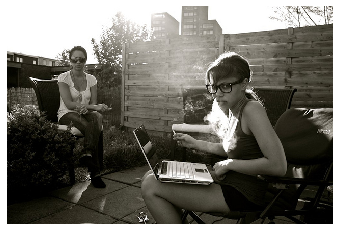

In [9]:
img = io.imread(coco_img['coco_url'])
plt.axis('off')
plt.imshow(img)
plt.show()

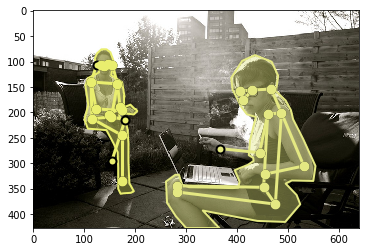

In [16]:
# load and display keypoints annotations
plt.imshow(img)
#plt.axis('off')

ax = plt.gca()
ann_ids = coco.getAnnIds(imgIds=coco_img['id'], iscrowd=False)
anns = coco.loadAnns(ann_ids)
coco.showAnns(anns)

In [17]:
anns[1]['bbox']

[260.29, 87.37, 293.58, 339.63]

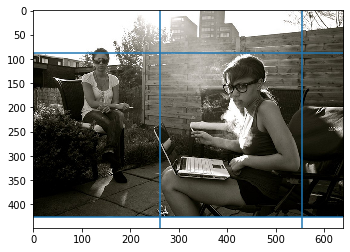

In [24]:
plt.imshow(img)
plt.axvline(anns[1]['bbox'][0])
plt.axvline(anns[1]['bbox'][0] + anns[1]['bbox'][2])
plt.axhline(anns[1]['bbox'][1])
plt.axhline(anns[1]['bbox'][1] + anns[1]['bbox'][3])

In [19]:
anns[1]['keypoints']

[412,
 176,
 2,
 429,
 156,
 2,
 406,
 158,
 2,
 467,
 154,
 2,
 0,
 0,
 0,
 487,
 201,
 2,
 460,
 203,
 2,
 531,
 305,
 2,
 444,
 279,
 2,
 455,
 321,
 2,
 367,
 271,
 1,
 475,
 380,
 2,
 452,
 347,
 2,
 281,
 356,
 2,
 282,
 344,
 2,
 0,
 0,
 0,
 0,
 0,
 0]